# Children's Assessment Perfomance Prediction

This challenge is about predicting the performance of children in brain games. That may sound a little useless, yet a lot of psychiatrists think it to be such treasure for the youth education. Indeed, correlations between having a good performance and some special data features like the frequency of playing some sort of videogames for an example may help understand the deep brain stimulations and what could be a major change in our way of teaching.

Through this challenge, you will have some anonymous data about the games that are played, types of those games, how the data is processed and the problems we may have with it. More descriptions will be given throughout this notebook when necessary.

First, let's import the classical python Mandatory libraries. No guarantee our code is gonna match if you use your libs, however sometimes innovation brings beautiful surprises and the results do worth a try (and more).


## Import libraries

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

## Getting Data

Upset!! Yes, we know but the slower an information comes the longer it lasts ... This will be our way and get used to it ;) 

This challenge aims to predict if a child, given his past gaming history and a final game session assessment, will shine from his first attempt, make it through after a second chance, maybe after several trials or just sitting there without passing the assessment game at all.

Easy huh! :|


In [3]:
# Read data
data = pd.read_csv(r'data\train.csv.zip')

## First insight into the data

The columns are as follows :

- Installation ID : its an ID assigned to an installation instance, that means if you have a Snapchat installed on your device and you have never deleted it from it, you will always have the same installation ID. however, if you uninstall it and decide a beautiful that you missed your buddies on that app which means reinstall again, then you may find yourself with a new Installation ID. 

- Title : it corresponds to the name of the game you are playing, you have 42 of them

- Type : You have 4 types of games, but only one of them is useful for assessment, that's why maybe the data provider decided to name it accordingly.

- World : Every single game has an attribute about the Word where it, virtually, takes place.

- Game session and Game time: Remember we said that you have an Installation ID that may be the same for your whole life, well for this one rules change, at every time you start playing a game, you will have a game session ID. You can see it as your Facebook login history. We would then let you guess what Game Time stands for! 

- Event code and Timestamp: When you launch a new game session you will go through several events dated by Timestamp column. For example, when starting a game has the code 2000 and that why you will see at each game session. Event code would correspond to commenting, liking or any other log activity on Instagram


In [4]:
data.head(5)

,Unnamed: 0,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,0,27253bdc,0ea9ecc81a565215,2019-09-10T16:50:24.910Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,1,27253bdc,c1ea43d8b8261d27,2019-09-10T16:50:55.503Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,2,27253bdc,7ed86c6b72e725e2,2019-09-10T16:51:51.805Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 2,Clip,MAGMAPEAK
3,3,27253bdc,7e516ace50e7fe67,2019-09-10T16:53:12.825Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Crystal Caves - Level 1,Clip,CRYSTALCAVES
4,4,7d093bf9,a022c3f60ba547e7,2019-09-10T16:54:12.115Z,"{""version"":""1.0"",""round"":0,""event_count"":1,""ga...",00abaee7,1,2000,0,Chow Time,Game,CRYSTALCAVES


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156414 entries, 0 to 1156413
Data columns (total 12 columns):
Unnamed: 0         1156414 non-null int64
event_id           1156414 non-null object
game_session       1156414 non-null object
timestamp          1156414 non-null object
event_data         1156414 non-null object
installation_id    1156414 non-null object
event_count        1156414 non-null int64
event_code         1156414 non-null int64
game_time          1156414 non-null int64
title              1156414 non-null object
type               1156414 non-null object
world              1156414 non-null object
dtypes: int64(4), object(8)
memory usage: 105.9+ MB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1156414.0,578206.500000,3.338281e+05,0.0,289103.25,578206.5,867309.75,1156413.0
event_count,1156414.0,110.707501,2.193408e+02,1.0,25.00,60.0,124.00,4456.0
event_code,1156414.0,3514.352696,6.802671e+02,2000.0,3021.00,4020.0,4035.00,5010.0
game_time,1156414.0,186964.591110,1.670162e+06,0.0,30561.25,71028.0,147691.00,88598420.0


In [7]:
data[['installation_id','game_session','event_code','title','type','world']].nunique()

installation_id     1000
game_session       28445
event_code            42
title                 44
type                   4
world                  4
dtype: int64

## A closer look on the full (raw) data

In [8]:
data.groupby(['installation_id','game_session'])['title'].value_counts().head(20)

installation_id  game_session      title                        
00abaee7         09a603baebcc2052  Egg Dropper (Activity)            61
                 0ea9ecc81a565215  Welcome to Lost Lagoon!            1
                 18c82207b2e63482  Costume Box                        1
                 1c203986674d7d9b  Balancing Act                      1
                 237c4e2190a4b5fe  Lifting Heavy Things               1
                 2841aa0233220ac0  All Star Sorting                  79
                 2c3592f7677f33cf  12 Monkeys                         1
                 348d7f09f96af313  Cauldron Filler (Assessment)       1
                 3b845db6d1d108b5  Tree Top City - Level 1            1
                 41591f66b833b47c  Fireworks (Activity)              31
                 6ecafbf9e7451a99  Bug Measurer (Activity)           12
                 704e6c1a66c26810  Crystal Caves - Level 3            1
                 74ce1888faaea83a  Sandcastle Builder (Activity)    103

We see that each user (**installation_id**) have multiple game sessions in which they play a particular activity (**title**). For each activity, a different number of events are performed.

We now do an analyse on the different titles in the given dataset.

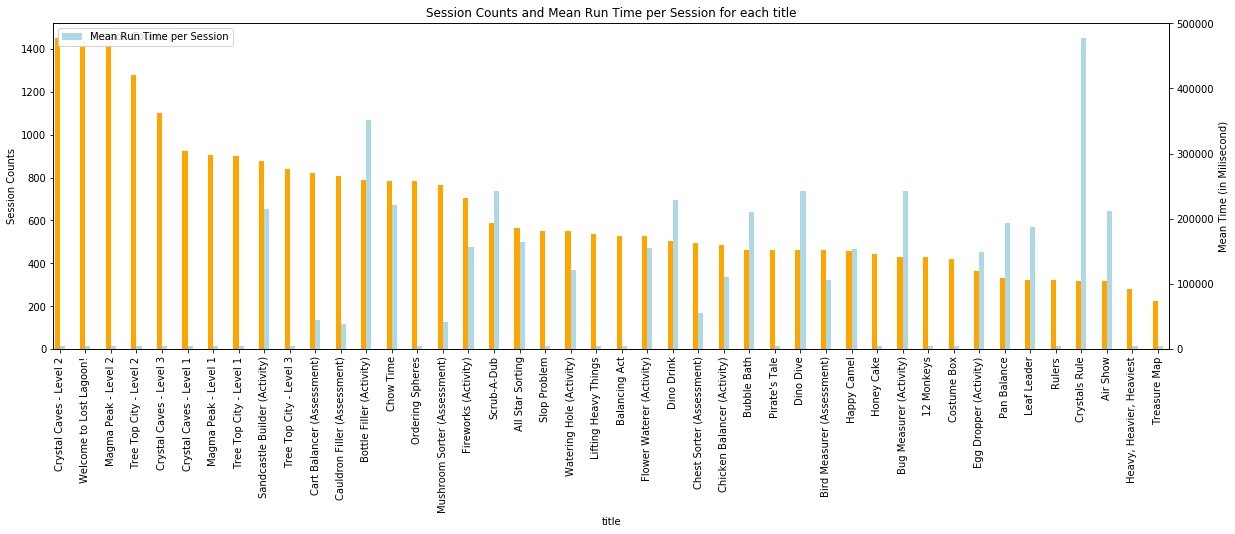

In [9]:
fig = plt.figure(figsize=(20,6)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.2

groupby_title = data.groupby(['game_session','title'])['game_time'].agg('max').groupby('title')\
            .agg(['count','mean']).sort_values(by='count',ascending=False)
# If we want to count events
# groupby_title = data.groupby(['game_session','title'])['event_count'].agg('sum').groupby('title')\
#             .agg(['count','mean']).sort_values(by='count',ascending=False)

groupby_title['count'].plot(kind='bar', color='orange', ax=ax, width=width, position=1, label='Session Counts')
# Add 5 seconds to avoid zeros in plot
(5000+groupby_title['mean']).plot(kind='bar', color='lightblue', ax=ax2, width=width, position=0, label='Mean Run Time per Session')

ax.set_ylabel('Session Counts')
ax2.set_ylabel('Mean Time (in Milisecond)')

ax.legend(loc='upper left')
ax2.legend()

plt.title('Session Counts and Mean Run Time per Session for each title')
plt.show()

We see that there are many activities that have high session counts but in constrast have zero run time. They are in fact the activities that require only one (or a few) event to complete. For example, the title **Welcome to Lost Lagoon!** corresponds to the opening scene of the application, hence it has the most number of times played. We also note that the mean run time of each session is not longer than $500 \ 000 \ ms$, or about $8$ minutes.

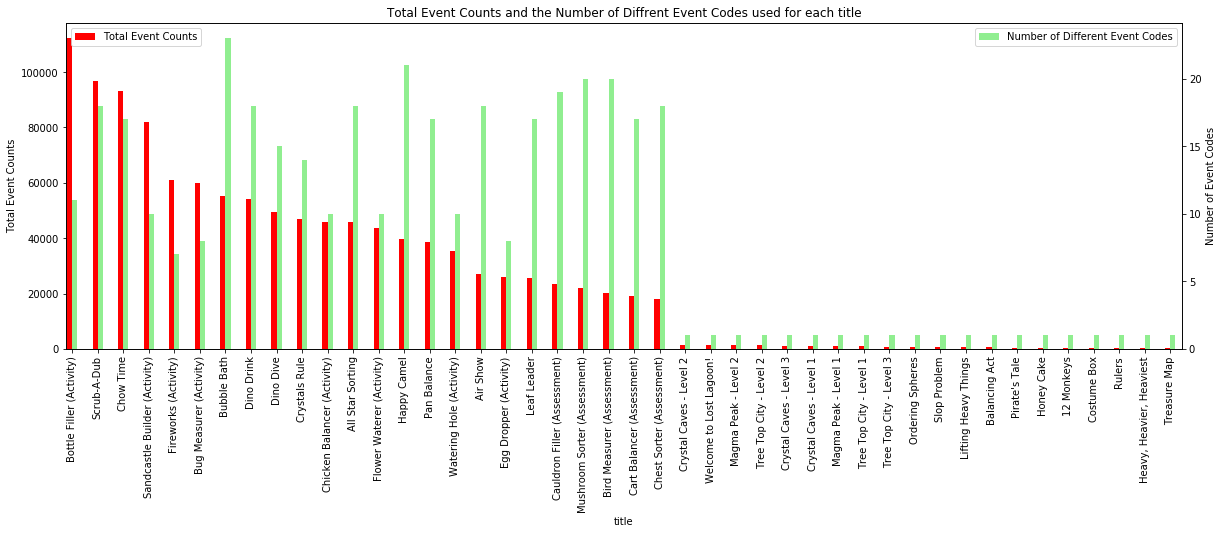

In [10]:
fig = plt.figure(figsize=(20,6)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.2

groupby_title = data.groupby('title')['event_code'].agg([pd.Series.nunique,'count'])\
            .sort_values(by='count',ascending=False)

groupby_title['count'].plot(kind='bar', color='red', ax=ax, width=width, position=1, label='Total Event Counts')
groupby_title['nunique'].plot(kind='bar', color='lightgreen', ax=ax2, width=width, position=0, label='Number of Different Event Codes')

ax.set_ylabel('Total Event Counts')
ax2.set_ylabel('Number of Event Codes')

ax.legend(loc='upper left')
ax2.legend()

plt.title('Total Event Counts and the Number of Diffrent Event Codes used for each title')
plt.show()

We see that half of the activities have very little events compared to other activities. If we look at the number of different event codes used for the activities, we see that these activities with low counts correspond to the activities with only one event code. We also notice that the activities with many event codes (meaning that it's more complex to play) tend to have low session counts or mean run time and hence lead to lower event counts.

Let's take a look at the different types of the activities.

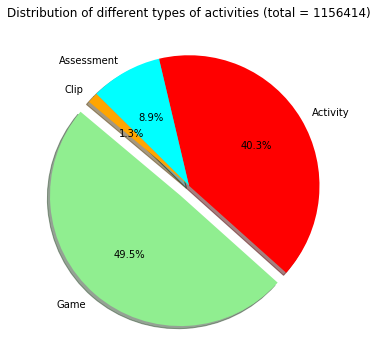

In [11]:
type_counts = data.type.value_counts()
# Data to plot
labels = type_counts.keys()
sizes = type_counts.values
explode = (0.1, 0, 0, 0)  # explode 1st slice

# Plot
plt.figure(figsize=(6,6))
plt.pie(sizes, explode=explode, labels=labels, 
        colors=['lightgreen', 'red','cyan','orange'],
autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Distribution of different types of activities (total = %d)' %np.sum(sizes))
plt.show()

As we mentioned earlier, there are 4 types of action in the application: **Game**, **Activity**, **Assessment** and **Clip**. This plot tells us that most of the time the users play game or do activities with the application, while only a few percentage of users actually watch clip.

We then take a look at the different worlds.

C:\Users\mohamed.abdel-wedoud\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


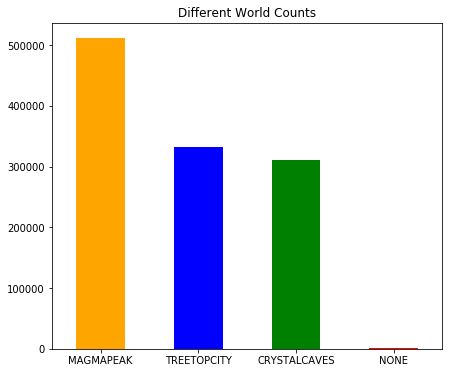

In [12]:
data.world.value_counts()\
        .plot.bar(figsize=(7,6), 
                  title='Different World Counts',
                  colors = ['orange','blue','green','red'], 
                  rot=0)

We see that most of the activities are taken on three worlds: **Magmapeak**, **Crystalcaves** and **Treetopcity**. 

We also note that each title is performed on a particular world.

In [13]:
print(data[['title','world']].drop_duplicates().head(10))
len(data[['title','world']].drop_duplicates()) == len(data[['title']].drop_duplicates())

                       title         world
0    Welcome to Lost Lagoon!          NONE
1       Magma Peak - Level 1     MAGMAPEAK
2       Magma Peak - Level 2     MAGMAPEAK
3    Crystal Caves - Level 1  CRYSTALCAVES
4                  Chow Time  CRYSTALCAVES
163            Balancing Act  CRYSTALCAVES
164  Crystal Caves - Level 2  CRYSTALCAVES
165  Tree Top City - Level 1   TREETOPCITY
166         All Star Sorting   TREETOPCITY
245              Costume Box   TREETOPCITY


True

We finally pay attention to the timestamps in the data.

In [14]:
df_times = data.loc[:,['timestamp']]
df_times['timestamp'] = pd.to_datetime(df_times['timestamp'])
df_times['date'] = df_times['timestamp'].dt.date

In [15]:
print("Number of dates in the dataset:",df_times['date'].nunique())
print("First date:",min(df_times['date']))
print("Last date:",max(df_times['date']))

Number of dates in the dataset: 83
First date: 2019-07-24
Last date: 2019-10-14


We see that the data is collected on 85 days from **23/07/2019** to **22/10/2019**.

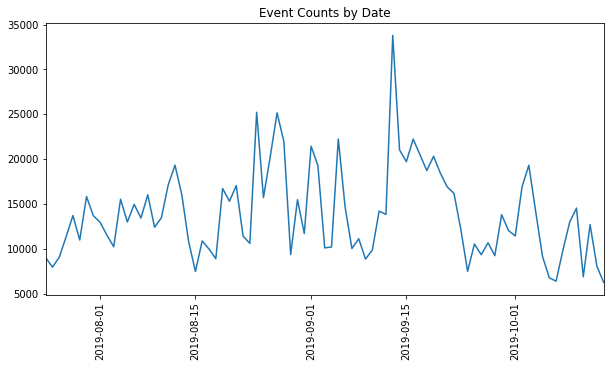

In [16]:
df_times['date'].value_counts().sort_index().plot(figsize=(10,5), rot=90, title = "Event Counts by Date")

We see that the number of events played increases gradually until the first of October.

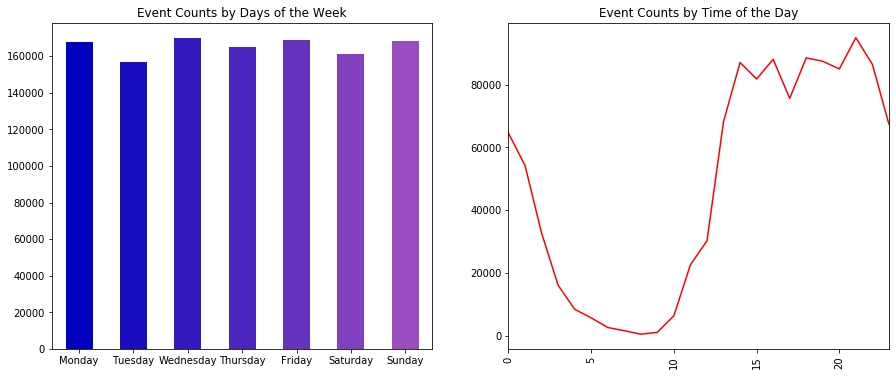

In [17]:
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

df_times['timestamp'].dt.weekday_name.value_counts()\
    [['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]\
            .plot.bar(
                  title='Event Counts by Days of the Week',
                  color = [(x/10.0, x/20.0, 0.75) for x in range(7)], 
                  rot=0, ax= ax1)

df_times['timestamp'].dt.hour.value_counts().sort_index()\
        .plot(rot=90, title = "Event Counts by Time of the Day", color = 'red')

We observe a common behavior, the children play the most on Friday, and they tend to play at free time from 15h to 20h.

## Preprocess & Split the data into train/test sets

To have a consistent model we need to split into two folders, one for training and a second for testing! You know why of course, overfitting, Boy!

As we only care about the Assessment type (with **event_code**=4100, or 4110 for **Bird Measurer**), we only take the events with these information. To avoid overfitting, we also take out of all the installation_id that appear in the train set from the test set so that users appearing in train set are not present in test set.

In [18]:
def get_train_test(df, test_frac=0.25):
    """
    Splits the dataset into train and test sets according to the challenge procedure
    """

    ids_attempted = df[(df.type == 'Assessment') & \
                       ((df.event_code == 4100) & (df.title != 'Bird Measurer (Assessment)') |
                       (df.event_code == 4110) & (df.title == 'Bird Measurer (Assessment)'))] \
                       .installation_id.unique()
    test_ids = np.random.choice(ids_attempted, size=int(test_frac * len(ids_attempted)), replace=False)

    train = df[~df.installation_id.isin(test_ids)].reset_index(drop=True)
    test = df[df.installation_id.isin(test_ids)].reset_index(drop=True)

    return train, test

In [19]:
# Split train/test
train, test = get_train_test(data)

## Convert data to X/y form


Let us have a quick flashback for a little while if we assume that every installation id corresponds exactly to a single child then our task is to guess whether or not he going to succeed in the last assessment game he had from one try, two extra ... We have four classes to put a child in (group 0: never make it through (the smarted of course), group 1: they are persevering and beat the game after at least 3 trials, group 2: the dumbest they prefer to fail at first attempt and succeed at a second just to lower their score, finally group 3: Hell, if I only had 1% of their luck, those guys smash everything at the first time). That's how we generate our target Y from both folders train and test. 

For some iid matters, we will truncate the history of every installation id at a random Assessment game, chosen uniformly among all assessment game sessions for that installation id, and whose details are be hidden for prediction purposes.

In [20]:
def truncate_and_get_y(df):
    """
    Truncates the dataset randomly for each user, according to the challenge procedure
    Also returns y before the information is lost through the truncation
    """

    # Sort dataframe
    df = df.copy()
    df.timestamp = pd.to_datetime(df.timestamp)
    df.sort_values(['installation_id', 'timestamp'], inplace=True)

    # Filter dataframe
    df_attempts = df[(df.type == 'Assessment') & \
                    ((df.event_code == 4100) & (df.title != 'Bird Measurer (Assessment)') |
                     (df.event_code == 4110) & (df.title == 'Bird Measurer (Assessment)'))].copy()
    df = df[df.installation_id.isin(df_attempts.installation_id.unique())].copy().reset_index(drop=True)

    # Compute y
    df_attempts['success'] = df_attempts.event_data.apply(lambda x: json.loads(x)['correct']) * 1
    passed = df_attempts.groupby('game_session').success.max().to_frame('passed')
    n_attempts = df_attempts.groupby('game_session').size().to_frame('n_attempts')
    accuracy = pd.Series(0, index=passed.index)
    accuracy.loc[(passed.passed == 1) & (n_attempts.n_attempts > 2)] = 1
    accuracy.loc[(passed.passed == 1) & (n_attempts.n_attempts == 2)] = 2
    accuracy.loc[(passed.passed == 1) & (n_attempts.n_attempts == 1)] = 3

    selected_sessions = df_attempts.groupby('installation_id').game_session\
        .apply(lambda obj: obj.loc[np.random.choice(obj.index)])
    y = pd.Series(accuracy.loc[selected_sessions].values, index=selected_sessions.index)

    # Truncate
    df['idx'] = df.index
    marked_start = df.game_session.isin(selected_sessions) \
        & df.idx.isin(df.groupby('game_session').idx.first())
    marked_start = marked_start[marked_start].index
    marked_end = df.idx.isin(df.groupby('installation_id').idx.last())
    marked_end = marked_end[marked_end].index
    df.drop('idx', axis=1, inplace=True)
    idx = list(range(marked_start[0] + 1))
    for start, end in zip(marked_start[1:], marked_end[:-1]):
        idx += list(range(end + 1, start + 1))
    df = df.loc[idx]

    return df, y

In [21]:
# Truncate and get y
train, y_train = truncate_and_get_y(train)
test, y_test = truncate_and_get_y(test)

In [22]:
from sklearn.model_selection import GroupShuffleSplit

In [28]:
cv = GroupShuffleSplit(n_splits=4, test_size=0.20, random_state=42)
a = cv.split(train.groupby('installation_id'), y_train, groups=train['installation_id'])

In [35]:
for fold_i, fold in enumerate(a):
    print(fold_i)

In [64]:
from submissions.starting_kit.preprocessing import preprocessing

In [86]:
len(train.installation_id.unique())

418

Now let's take a look at the labels. As we can see below the labels are not well distributed.

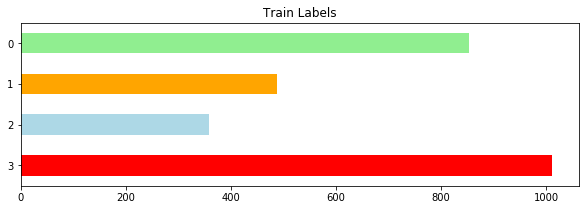

In [17]:
y_train.value_counts().sort_index(ascending=False) \
    .plot(kind='barh', figsize=(10, 3), title='Train Labels', color=['r','lightblue','orange','lightgreen'])
plt.show()

## Feature Processing

Preprocessing features : 

- n_sessions : number of sessions for each user

- unique_events_per_session : mean number of unique events in a session for each user

- mean_game_time : mean game time in a session for each user

- min_hour : earliest hour played for each user

- mean_hour : mean hour played for each user

- max_hour : latest hour played for each user

- most_played_dayofweek : most played day of the week for each user

- first_day : the day the user first played, for each user

- median_day : the median day the user has played, for each user

- hour : the hour at the time the assessment we want to predict has occurred

- dayofweek : the day of the week at the time the assessment we want to predict has occurred

- day : the day at the time the assessment we want to predict has occurred

- total_days : the number of different days the user has played before the assessment we want to predict occurred

- prediction_assessment_{title}: whether the assessment we have to predict is this title or not, for each user

- prediction_world_{title}: whether the assessment we have to predict belongs to that world or not, for each user

- type_{type}: the number of times the user has played a title belonging to that type can be 'Assessment', 'Game', 'Clip' or 'Activity'

- world_{world} : the number of times the user has played a title belonging to that world can be 'MAGMAPEAK', 'TREETOPCITY', 'CRYSTALCAVES' or 'NONE'

- n_events_per_session_{event_code} : the mean number of times a given event_code has occurred per game session, for that user

- mean_passed: percentage of the assessments passed among the attempted assessments for each user

- mean_attempts: mean number of attempts among the attempted assessments for each user

- max_attempts: maximum number of attempts among the attempted assessments for each user

- n_sessions_{title} : number of sessions of a given title, for each user

- unique_events_{title}: mean number of unique events happening in a session of a given title, for each user

- game_time_{title}: mean game time in a session of a given title, for each user

- mean_passed_{title}: percentage of the assessments passed among the attempted assessments for a given title, for each user

- mean_attempts_{title}: mean number of attempts among the attempted assessments for a given title, for each user

- max_attempts_{title}: maximum number of attempts among the attempted assessments for a given title, for each user


PS: These are the features we thought to be relevant toward the prediction task, some of them that finally were not, are dropped off at the end. Those are typically columns with only one value because they do not give any additional information. However, feel free to add whatever could sound plausible as a key feature.

In [94]:
def preprocessing(df, train_cols=None):

    # Clean dataset
    df = df.copy()
    df['hour'] = df.timestamp.dt.hour
    df['dayofweek'] = df.timestamp.dt.dayofweek
    df['dayofyear'] = df.timestamp.dt.dayofyear
    df_attempts = df[(df.type == 'Assessment') & \
                    ((df.event_code == 4100) & (df.title != 'Bird Measurer (Assessment)') |
                     (df.event_code == 4110) & (df.title == 'Bird Measurer (Assessment)'))].copy()
    df_attempts['success'] = df_attempts.event_data.apply(lambda x: json.loads(x)['correct']) * 1
    passed = df_attempts.groupby(['installation_id', 'game_session']).success.max()\
        .to_frame('passed').reset_index()
    n_attempts = df_attempts.groupby(['installation_id', 'game_session']).size()\
        .to_frame('n_attempts').reset_index()

    # Build features
    # General user features
    X = pd.DataFrame()
    X['n_sessions'] = df.groupby('installation_id').game_session.nunique()
    X['unique_events_per_session'] = df.groupby('installation_id').size()
    X.unique_events_per_session /= X.n_sessions
    game_time = df.groupby(['installation_id', 'game_session']).game_time.max().reset_index()
    X['mean_game_time'] = game_time.groupby('installation_id').game_time.mean()

    # Time user features
    hour = df.groupby(['installation_id', 'game_session']).hour.first().reset_index()
    X['min_hour'] = hour.groupby('installation_id').hour.min()
    X['mean_hour'] = hour.groupby('installation_id').hour.mean()
    X['max_hour'] = hour.groupby('installation_id').hour.max()
    dayofweek_count = df.groupby(['installation_id', 'dayofweek'])\
        .game_session.nunique().to_frame('count').reset_index()
    dayofweek_count.sort_values(['installation_id', 'count'], inplace=True)
    X['most_played_dayofweek'] = dayofweek_count.groupby('installation_id').dayofweek.last()
    X['first_day'] = df.groupby('installation_id').dayofyear.min()
    different_days = df.groupby(['installation_id', 'dayofyear']).size().reset_index()
    X['median_day'] = different_days.groupby('installation_id').dayofyear.median()

    X['hour'] = df.groupby('installation_id').hour.last()
    X['dayofweek'] = df.groupby('installation_id').dayofweek.last()
    X['day'] = df.groupby('installation_id').dayofyear.last()
    X['total_days'] = df.groupby('installation_id').dayofyear.nunique()

    # Predicted game features
    prediction_assessment = df.groupby('installation_id').title.last()\
        .to_frame('last').reset_index()
    prediction_assessment['occurred'] = 1
    prediction_assessment = prediction_assessment\
        .pivot(index='installation_id', columns='last', values='occurred').fillna(0)
    prediction_assessment.columns = ['prediction_assessment_{}'.format(c)
                                     for c in prediction_assessment.columns]
    X = X.merge(prediction_assessment, how='left', left_index=True, right_index=True)

    prediction_world = df.groupby('installation_id').world.last()\
        .to_frame('last').reset_index()
    prediction_world['occurred'] = 1
    prediction_world = prediction_world\
        .pivot(index='installation_id', columns='last', values='occurred').fillna(0)
    prediction_world.columns = ['prediction_world_{}'.format(c)
                                     for c in prediction_world.columns]
    X = X.merge(prediction_world, how='left', left_index=True, right_index=True)

    # Gameplay user features
    type_counts = df.groupby(['installation_id', 'type']).game_session.nunique()\
        .reset_index().pivot(index='installation_id', columns='type', values='game_session').fillna(0)
    type_counts.columns = ['type_{}'.format(c) for c in type_counts.columns]
    X = X.merge(type_counts, how='left', left_index=True, right_index=True)

    world_counts = df.groupby(['installation_id', 'world']).game_session.nunique()\
        .reset_index().pivot(index='installation_id', columns='world', values='game_session').fillna(0)
    world_counts.columns = ['world_{}'.format(c) for c in world_counts.columns]
    X = X.merge(world_counts, how='left', left_index=True, right_index=True)

    event_counts = df.groupby(['installation_id', 'event_code']).event_count.sum()\
        .reset_index().pivot(index='installation_id', columns='event_code', values='event_count').fillna(0)
    event_counts = event_counts.div(X.n_sessions, axis=0)
    event_counts.columns = ['n_events_per_session_{}'.format(c) for c in event_counts.columns]
    X = X.merge(event_counts, how='left', left_index=True, right_index=True)

    # Success user features
    X['mean_passed'] = passed.groupby('installation_id').passed.mean()
    X.mean_passed.fillna(-1, inplace=True)
    X['mean_attempts'] = n_attempts.groupby('installation_id').n_attempts.mean()
    X['max_attempts'] = n_attempts.groupby('installation_id').n_attempts.max()
    X.fillna(0, inplace=True)

    # General user features for each title
    title_sessions = df.groupby(['installation_id', 'title']).game_session.nunique()\
        .reset_index().pivot(index='installation_id', columns='title', values='game_session').fillna(0)
    title_unique_events = df.groupby(['installation_id', 'title']).size().to_frame('size')\
        .reset_index().pivot(index='installation_id', columns='title', values='size')
    title_unique_events  = (title_unique_events / title_sessions).fillna(0)
    title_sessions.columns = ['n_sessions_{}'.format(c) for c in title_sessions.columns]
    title_unique_events.columns = ['unique_events_{}'.format(c) for c in title_unique_events.columns]
    X = X.merge(title_sessions, how='left', left_index=True, right_index=True)
    X = X.merge(title_unique_events, how='left', left_index=True, right_index=True)

    game_time = df.groupby(['installation_id', 'title', 'game_session']).game_time.max().reset_index()
    title_times = game_time.groupby(['installation_id', 'title']).game_time.mean()\
        .reset_index().pivot(index='installation_id', columns='title', values='game_time').fillna(0)
    title_times.columns = ['game_time_{}'.format(c) for c in title_times.columns]
    X = X.merge(title_times, how='left', left_index=True, right_index=True)

    # Success user features for each assessment
    passed = df_attempts.groupby(['installation_id', 'title', 'game_session']).success.max()\
        .to_frame('passed').reset_index()
    n_attempts = df_attempts.groupby(['installation_id', 'title', 'game_session']).size()\
        .to_frame('n_attempts').reset_index()
    title_passed = passed.groupby(['installation_id', 'title']).passed.mean().to_frame('mean')\
        .reset_index().pivot(index='installation_id', columns='title', values='mean')
    title_passed.columns = ['mean_passed_{}'.format(c) for c in title_passed.columns]
    X = X.merge(title_passed, how='left', left_index=True, right_index=True).fillna(-1)

    title_mean_attempts = n_attempts.groupby(['installation_id', 'title'])\
        .n_attempts.mean().to_frame('mean')\
        .reset_index().pivot(index='installation_id', columns='title', values='mean')
    title_mean_attempts.columns = ['mean_attempts_{}'.format(c) for c in title_mean_attempts.columns]
    X = X.merge(title_mean_attempts, how='left', left_index=True, right_index=True).fillna(0)

    title_max_attempts = n_attempts.groupby(['installation_id', 'title'])\
        .n_attempts.max().to_frame('max')\
        .reset_index().pivot(index='installation_id', columns='title', values='max')
    title_max_attempts.columns = ['max_attempts_{}'.format(c) for c in title_max_attempts.columns]
    X = X.merge(title_max_attempts, how='left', left_index=True, right_index=True).fillna(0)
    X['installation_id'] = df.installation_id.unique()

    # Drop columns with only 1 modality
    if train_cols is None:
        X = X.loc[:, X.nunique() != 1]
    else:
        X = X.loc[:, train_cols]

    return X

All the features above as one can notice are numerical variables except for the days' related columns as well as hours related columns. The problem that day hours are cyclic and so defining a mean could not be that easy. That means that 11 pm would be closer to 8 pm than it is for 1 am. The problem is the same for the days of the week. Here are solutions to avoid all biases caused by this :

- We may project the variables on a cercle 

<img src="hours.png">

- In case that you use a regressor, you may proceed using Bayesian estimators, in machine learning jargon using target encoding : $ Encoding(X) \,  = \,  E(Y| X = \, day \, or \, hour )$



In [95]:
# Extract features
X_train = preprocessing(train)
X_test = preprocessing(test, train_cols=X_train.columns)

Perform direct prediction using a random search or a grid search with cross validation

In [38]:
X_train.shape

(418, 200)

## Training on the Preprocesed Features

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier as RFC

#randomize hyperparameters selection to get better more effective results

max_depth_range = np.random.permutation(np.arange(1,50))[:20]
max_features_range = np.random.permutation(np.arange(1,200))[:10]
#max_features_range = np.array([163])
n_estimators_range = np.random.permutation(np.arange(1,20))[:8]

#the hyperparameters grid
param_grid = {'n_estimators' : n_estimators_range, 'max_depth': max_depth_range, 'max_features': max_features_range}


#hyperparameters selection with respect to the cross validation criterion
grid = GridSearchCV(RFC(), param_grid=param_grid, verbose=3, return_train_score=True)



In [ ]:
grid.fit(X_train, y_train)

In [ ]:
grid.best_params_

In [ ]:
grid.score(X_test, y_test)

In [ ]:
estimator = RFC(max_depth=3, max_features=163, n_estimators= 15)

In [ ]:
estimator.fit(X_train,y_train)

In [ ]:
predicted_y = estimator.predict(X_test)

In [ ]:
score = np.mean(predicted_y == y_test)

In [ ]:
score

We are still too far from having a reliable model and have to dive deep into the model construction. 

This is could be a plausible lead: Lying and lying too much?

Till now we have been somehow considering that telling that someone that a child, who succeeded from its first attempt, had succeeded from its second attempt is the same as telling that he made it from three and more attempts. 

The metric used in scoring is symmetrical while the problem decision maybe not be symmetrical.

-Check out a weighted matrix evaluation via these links : 

https://scikitlearn.org/stable/modules/generated/sklearn.metrics.cohen_kappa_score.html

https://en.wikipedia.org/wiki/Cohen%27s_kappa

That means we need to change our scoring !

**From now on we will be using the quadratic weighted kappa metic for models assessment and it's going to be the one used to assess your submitted model**

Note that with this metric a 0.56 will be an outstanding score because it's quadratically weighted

In [23]:
from sklearn.metrics import cohen_kappa_score as scoring_kappa

from sklearn.metrics import make_scorer

def score(y_true, y_pred):
    
    if isinstance(y_true, pd.Series):
        y_true = y_true.values
    
    score = scoring_kappa(y_true,y_pred,weights='quadratic')
    
    return score

scoring = make_scorer(score, greater_is_better=True)

# Random Grid search for the new scoring

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier as RFC


#randomize hyperparameters selection to get better more effective results

max_depth_range = np.random.permutation(np.arange(1,50))[:5]
max_features_range = np.random.permutation(np.arange(1,200))[:5]
#max_features_range = np.array([163])
n_estimators_range = np.random.permutation(np.arange(1,20))[:5]

#the hyperparameters grid
param_grid = {'n_estimators' : n_estimators_range, 'max_depth': max_depth_range, 'max_features': max_features_range}


#hyperparameters selection with respect to the cross validation criterion using the new metric
grid = GridSearchCV(RFC(), param_grid=param_grid, verbose=3, scoring = scoring,  return_train_score=True)

In [25]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 125 candidates, totalling 625 fits
[CV] max_depth=43, max_features=22, n_estimators=6 ...................
[CV]  max_depth=43, max_features=22, n_estimators=6, score=(train=0.957, test=0.362), total=   0.2s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



[CV] max_depth=43, max_features=22, n_estimators=6 ...................
[CV]  max_depth=43, max_features=22, n_estimators=6, score=(train=0.945, test=0.408), total=   0.1s
[CV] max_depth=43, max_features=22, n_estimators=6 ...................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV]  max_depth=43, max_features=22, n_estimators=6, score=(train=0.957, test=0.294), total=   0.2s
[CV] max_depth=43, max_features=22, n_estimators=6 ...................
[CV]  max_depth=43, max_features=22, n_estimators=6, score=(train=0.954, test=0.364), total=   0.2s
[CV] max_depth=43, max_features=22, n_estimators=6 ...................
[CV]  max_depth=43, max_features=22, n_estimators=6, score=(train=0.950, test=0.361), total=   0.2s
[CV] max_depth=43, max_features=22, n_estimators=14 ..................
[CV]  max_depth=43, max_features=22, n_estimators=14, score=(train=0.993, test=0.379), total=   0.3s
[CV] max_depth=43, max_features=22, n_estimators=14 ..................
[CV]  max_depth=43, max_features=22, n_estimators=14, score=(train=0.990, test=0.368), total=   0.3s
[CV] max_depth=43, max_features=22, n_estimators=14 ..................
[CV]  max_depth=43, max_features=22, n_estimators=14, score=(train=0.994, test=0.404), total=   0.3s
[CV] max_depth=43, max_features=22, n_esti

[CV]  max_depth=43, max_features=158, n_estimators=6, score=(train=0.943, test=0.330), total=   1.0s
[CV] max_depth=43, max_features=158, n_estimators=6 ..................
[CV]  max_depth=43, max_features=158, n_estimators=6, score=(train=0.942, test=0.383), total=   0.9s
[CV] max_depth=43, max_features=158, n_estimators=6 ..................
[CV]  max_depth=43, max_features=158, n_estimators=6, score=(train=0.946, test=0.392), total=   0.9s
[CV] max_depth=43, max_features=158, n_estimators=6 ..................
[CV]  max_depth=43, max_features=158, n_estimators=6, score=(train=0.949, test=0.340), total=   0.7s
[CV] max_depth=43, max_features=158, n_estimators=6 ..................
[CV]  max_depth=43, max_features=158, n_estimators=6, score=(train=0.949, test=0.372), total=   0.8s
[CV] max_depth=43, max_features=158, n_estimators=14 .................
[CV]  max_depth=43, max_features=158, n_estimators=14, score=(train=0.990, test=0.431), total=   1.9s
[CV] max_depth=43, max_features=158, n

[CV]  max_depth=43, max_features=21, n_estimators=17, score=(train=0.991, test=0.395), total=   0.3s
[CV] max_depth=43, max_features=21, n_estimators=17 ..................
[CV]  max_depth=43, max_features=21, n_estimators=17, score=(train=0.995, test=0.391), total=   0.3s
[CV] max_depth=43, max_features=33, n_estimators=6 ...................
[CV]  max_depth=43, max_features=33, n_estimators=6, score=(train=0.949, test=0.343), total=   0.2s
[CV] max_depth=43, max_features=33, n_estimators=6 ...................
[CV]  max_depth=43, max_features=33, n_estimators=6, score=(train=0.948, test=0.397), total=   0.2s
[CV] max_depth=43, max_features=33, n_estimators=6 ...................
[CV]  max_depth=43, max_features=33, n_estimators=6, score=(train=0.954, test=0.372), total=   0.2s
[CV] max_depth=43, max_features=33, n_estimators=6 ...................
[CV]  max_depth=43, max_features=33, n_estimators=6, score=(train=0.953, test=0.321), total=   0.2s
[CV] max_depth=43, max_features=33, n_estim

[CV]  max_depth=36, max_features=22, n_estimators=17, score=(train=0.994, test=0.458), total=   0.4s
[CV] max_depth=36, max_features=22, n_estimators=17 ..................
[CV]  max_depth=36, max_features=22, n_estimators=17, score=(train=0.992, test=0.360), total=   0.4s
[CV] max_depth=36, max_features=22, n_estimators=17 ..................
[CV]  max_depth=36, max_features=22, n_estimators=17, score=(train=0.995, test=0.401), total=   0.4s
[CV] max_depth=36, max_features=22, n_estimators=17 ..................
[CV]  max_depth=36, max_features=22, n_estimators=17, score=(train=0.994, test=0.429), total=   0.4s
[CV] max_depth=36, max_features=150, n_estimators=6 ..................
[CV]  max_depth=36, max_features=150, n_estimators=6, score=(train=0.947, test=0.379), total=   0.9s
[CV] max_depth=36, max_features=150, n_estimators=6 ..................
[CV]  max_depth=36, max_features=150, n_estimators=6, score=(train=0.949, test=0.398), total=   0.8s
[CV] max_depth=36, max_features=150, n_

[CV]  max_depth=36, max_features=158, n_estimators=8, score=(train=0.965, test=0.407), total=   1.0s
[CV] max_depth=36, max_features=158, n_estimators=17 .................
[CV]  max_depth=36, max_features=158, n_estimators=17, score=(train=0.996, test=0.424), total=   2.3s
[CV] max_depth=36, max_features=158, n_estimators=17 .................
[CV]  max_depth=36, max_features=158, n_estimators=17, score=(train=0.987, test=0.441), total=   2.5s
[CV] max_depth=36, max_features=158, n_estimators=17 .................
[CV]  max_depth=36, max_features=158, n_estimators=17, score=(train=0.993, test=0.426), total=   2.3s
[CV] max_depth=36, max_features=158, n_estimators=17 .................
[CV]  max_depth=36, max_features=158, n_estimators=17, score=(train=0.994, test=0.422), total=   2.3s
[CV] max_depth=36, max_features=158, n_estimators=17 .................
[CV]  max_depth=36, max_features=158, n_estimators=17, score=(train=0.997, test=0.441), total=   2.6s
[CV] max_depth=36, max_features=21

[CV]  max_depth=36, max_features=33, n_estimators=8, score=(train=0.970, test=0.334), total=   0.3s
[CV] max_depth=36, max_features=33, n_estimators=8 ...................
[CV]  max_depth=36, max_features=33, n_estimators=8, score=(train=0.964, test=0.373), total=   0.3s
[CV] max_depth=36, max_features=33, n_estimators=8 ...................
[CV]  max_depth=36, max_features=33, n_estimators=8, score=(train=0.974, test=0.320), total=   0.3s
[CV] max_depth=36, max_features=33, n_estimators=17 ..................
[CV]  max_depth=36, max_features=33, n_estimators=17, score=(train=0.989, test=0.414), total=   0.6s
[CV] max_depth=36, max_features=33, n_estimators=17 ..................
[CV]  max_depth=36, max_features=33, n_estimators=17, score=(train=0.992, test=0.406), total=   0.7s
[CV] max_depth=36, max_features=33, n_estimators=17 ..................
[CV]  max_depth=36, max_features=33, n_estimators=17, score=(train=0.995, test=0.466), total=   1.0s
[CV] max_depth=36, max_features=33, n_esti

[CV]  max_depth=26, max_features=150, n_estimators=8, score=(train=0.961, test=0.383), total=   1.0s
[CV] max_depth=26, max_features=150, n_estimators=8 ..................
[CV]  max_depth=26, max_features=150, n_estimators=8, score=(train=0.971, test=0.364), total=   1.0s
[CV] max_depth=26, max_features=150, n_estimators=8 ..................
[CV]  max_depth=26, max_features=150, n_estimators=8, score=(train=0.964, test=0.417), total=   1.0s
[CV] max_depth=26, max_features=150, n_estimators=8 ..................
[CV]  max_depth=26, max_features=150, n_estimators=8, score=(train=0.971, test=0.380), total=   1.0s
[CV] max_depth=26, max_features=150, n_estimators=8 ..................
[CV]  max_depth=26, max_features=150, n_estimators=8, score=(train=0.969, test=0.456), total=   1.0s
[CV] max_depth=26, max_features=150, n_estimators=17 .................
[CV]  max_depth=26, max_features=150, n_estimators=17, score=(train=0.986, test=0.471), total=   2.0s
[CV] max_depth=26, max_features=150, n

[CV]  max_depth=26, max_features=21, n_estimators=12, score=(train=0.984, test=0.358), total=   0.3s
[CV] max_depth=26, max_features=21, n_estimators=12 ..................
[CV]  max_depth=26, max_features=21, n_estimators=12, score=(train=0.985, test=0.420), total=   0.3s
[CV] max_depth=26, max_features=21, n_estimators=8 ...................
[CV]  max_depth=26, max_features=21, n_estimators=8, score=(train=0.965, test=0.343), total=   0.1s
[CV] max_depth=26, max_features=21, n_estimators=8 ...................
[CV]  max_depth=26, max_features=21, n_estimators=8, score=(train=0.965, test=0.378), total=   0.2s
[CV] max_depth=26, max_features=21, n_estimators=8 ...................
[CV]  max_depth=26, max_features=21, n_estimators=8, score=(train=0.964, test=0.377), total=   0.2s
[CV] max_depth=26, max_features=21, n_estimators=8 ...................
[CV]  max_depth=26, max_features=21, n_estimators=8, score=(train=0.969, test=0.415), total=   0.2s
[CV] max_depth=26, max_features=21, n_estim

[CV]  max_depth=18, max_features=22, n_estimators=12, score=(train=0.968, test=0.374), total=   0.3s
[CV] max_depth=18, max_features=22, n_estimators=12 ..................
[CV]  max_depth=18, max_features=22, n_estimators=12, score=(train=0.951, test=0.392), total=   0.3s
[CV] max_depth=18, max_features=22, n_estimators=12 ..................
[CV]  max_depth=18, max_features=22, n_estimators=12, score=(train=0.959, test=0.370), total=   0.3s
[CV] max_depth=18, max_features=22, n_estimators=12 ..................
[CV]  max_depth=18, max_features=22, n_estimators=12, score=(train=0.953, test=0.443), total=   0.2s
[CV] max_depth=18, max_features=22, n_estimators=8 ...................
[CV]  max_depth=18, max_features=22, n_estimators=8, score=(train=0.943, test=0.355), total=   0.1s
[CV] max_depth=18, max_features=22, n_estimators=8 ...................
[CV]  max_depth=18, max_features=22, n_estimators=8, score=(train=0.927, test=0.401), total=   0.2s
[CV] max_depth=18, max_features=22, n_est

[CV]  max_depth=18, max_features=158, n_estimators=14, score=(train=0.945, test=0.406), total=   1.7s
[CV] max_depth=18, max_features=158, n_estimators=12 .................
[CV]  max_depth=18, max_features=158, n_estimators=12, score=(train=0.932, test=0.469), total=   1.6s
[CV] max_depth=18, max_features=158, n_estimators=12 .................
[CV]  max_depth=18, max_features=158, n_estimators=12, score=(train=0.940, test=0.429), total=   1.6s
[CV] max_depth=18, max_features=158, n_estimators=12 .................
[CV]  max_depth=18, max_features=158, n_estimators=12, score=(train=0.927, test=0.425), total=   1.5s
[CV] max_depth=18, max_features=158, n_estimators=12 .................
[CV]  max_depth=18, max_features=158, n_estimators=12, score=(train=0.927, test=0.454), total=   1.5s
[CV] max_depth=18, max_features=158, n_estimators=12 .................
[CV]  max_depth=18, max_features=158, n_estimators=12, score=(train=0.945, test=0.481), total=   1.5s
[CV] max_depth=18, max_features=1

[CV]  max_depth=18, max_features=33, n_estimators=14, score=(train=0.961, test=0.442), total=   0.5s
[CV] max_depth=18, max_features=33, n_estimators=14 ..................
[CV]  max_depth=18, max_features=33, n_estimators=14, score=(train=0.963, test=0.419), total=   0.4s
[CV] max_depth=18, max_features=33, n_estimators=14 ..................
[CV]  max_depth=18, max_features=33, n_estimators=14, score=(train=0.964, test=0.409), total=   0.4s
[CV] max_depth=18, max_features=33, n_estimators=12 ..................
[CV]  max_depth=18, max_features=33, n_estimators=12, score=(train=0.939, test=0.336), total=   0.4s
[CV] max_depth=18, max_features=33, n_estimators=12 ..................
[CV]  max_depth=18, max_features=33, n_estimators=12, score=(train=0.957, test=0.451), total=   0.3s
[CV] max_depth=18, max_features=33, n_estimators=12 ..................
[CV]  max_depth=18, max_features=33, n_estimators=12, score=(train=0.954, test=0.384), total=   0.4s
[CV] max_depth=18, max_features=33, n_e

[CV]  max_depth=28, max_features=150, n_estimators=14, score=(train=0.981, test=0.453), total=   2.1s
[CV] max_depth=28, max_features=150, n_estimators=14 .................
[CV]  max_depth=28, max_features=150, n_estimators=14, score=(train=0.992, test=0.454), total=   1.9s
[CV] max_depth=28, max_features=150, n_estimators=14 .................
[CV]  max_depth=28, max_features=150, n_estimators=14, score=(train=0.982, test=0.413), total=   2.0s
[CV] max_depth=28, max_features=150, n_estimators=14 .................
[CV]  max_depth=28, max_features=150, n_estimators=14, score=(train=0.987, test=0.412), total=   2.0s
[CV] max_depth=28, max_features=150, n_estimators=14 .................
[CV]  max_depth=28, max_features=150, n_estimators=14, score=(train=0.983, test=0.459), total=   2.0s
[CV] max_depth=28, max_features=150, n_estimators=12 .................
[CV]  max_depth=28, max_features=150, n_estimators=12, score=(train=0.986, test=0.418), total=   1.5s
[CV] max_depth=28, max_features=1

[CV]  max_depth=28, max_features=21, n_estimators=6, score=(train=0.935, test=0.360), total=   0.2s
[CV] max_depth=28, max_features=21, n_estimators=6 ...................
[CV]  max_depth=28, max_features=21, n_estimators=6, score=(train=0.944, test=0.398), total=   0.2s
[CV] max_depth=28, max_features=21, n_estimators=14 ..................
[CV]  max_depth=28, max_features=21, n_estimators=14, score=(train=0.986, test=0.400), total=   0.3s
[CV] max_depth=28, max_features=21, n_estimators=14 ..................
[CV]  max_depth=28, max_features=21, n_estimators=14, score=(train=0.997, test=0.425), total=   0.3s
[CV] max_depth=28, max_features=21, n_estimators=14 ..................
[CV]  max_depth=28, max_features=21, n_estimators=14, score=(train=0.992, test=0.413), total=   0.3s
[CV] max_depth=28, max_features=21, n_estimators=14 ..................
[CV]  max_depth=28, max_features=21, n_estimators=14, score=(train=0.990, test=0.416), total=   0.3s
[CV] max_depth=28, max_features=21, n_est

[Parallel(n_jobs=1)]: Done 625 out of 625 | elapsed:  9.1min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [26]:
grid.best_params_

{'max_depth': 18, 'max_features': 150, 'n_estimators': 14}

In [29]:
predicted_y = grid.predict(X_test)

In [31]:
score(predicted_y,y_test)

0.44649011962826557

In [2]:
!ramp_test_submission --quick-test

Testing Children Assessment Perfomance Prediction
Reading train and test files from ./data ...
Reading cv ...
Training submissions\starting_kit ...
CV fold 0
	score  quadratic kappa error      time
	train                   1.00  0.729398
	valid                   0.49  0.015626
	test                    0.29  0.015657
CV fold 1
	score  quadratic kappa error      time
	train                   0.99  0.153608
	valid                   0.21  0.000000
	test                    0.44  0.000000
CV fold 2
	score  quadratic kappa error     time
	train                   1.00  0.15346
	valid                   0.15  0.00000
	test                    0.43  0.00000
CV fold 3
	score  quadratic kappa error      time
	train                   1.00  0.148576
	valid                   0.17  0.002030
	test                    0.41  0.010073
----------------------------
Mean CV scores
----------------------------
	score quadratic kappa error        time
	train           1.0 ± 0.003  0.3 ± 0.25
	valid          0.25 